In [3]:
#Importar bibliotecas
import numpy as np
import tensorflow as tf
from keras import optimizers

2023-08-18 21:49:48.349952: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 21:49:48.819953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
#Configurar variáveis
dataset_input = "bin/dataset_input.txt"
dataset_output = "bin/dataset_output.txt"

In [5]:
#Inputando os dados
inputMatrix = np.loadtxt(dataset_input,dtype='float',delimiter=";")
outputMatrix = np.loadtxt(dataset_output,dtype='float',delimiter=";")#,usecols=np.arange(0,93))
#outputMatrix = np.array([(120, 5,120),
#                         (123,24,100),
#                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[ 7.75796078e+06 -3.63653347e+05 -1.15200000e+00  5.79400000e+00
  7.75795507e+06 -3.63644516e+05 -8.39000000e-01  0.00000000e+00
  1.00000000e-03]Input Matrix=[0.    0.001 0.02 ]Output Matrix
[ 7.75796078e+06 -3.63653347e+05 -1.15200000e+00  5.78600000e+00
  7.75795507e+06 -3.63644515e+05 -8.39000000e-01  0.00000000e+00
 -8.00000000e-03]Input Matrix=[ 0.    -0.008  0.02 ]Output Matrix
[ 7.75796078e+06 -3.63653347e+05 -1.15200000e+00  5.77900000e+00
  7.75795508e+06 -3.63644514e+05 -8.38000000e-01  0.00000000e+00
 -1.80000000e-02]Input Matrix=[ 0.    -0.018  0.02 ]Output Matrix
[ 7.75796078e+06 -3.63653347e+05 -1.15200000e+00  5.77300000e+00
  7.75795508e+06 -3.63644515e+05 -8.38000000e-01  0.00000000e+00
 -2.90000000e-02]Input Matrix=[ 0.    -0.029  0.02 ]Output Matrix
[ 7.75796078e+06 -3.63653347e+05 -1.15200000e+00  5.76700000e+00
  7.75795508e+06 -3.63644515e+05 -8.38000000e-01  0.00000000e+00
 -3.80000000e-02]Input Matrix=[ 0.    -0.038  0.02 ]Output Matrix
[ 7.75796078e+06 -3.636

In [6]:
inputMatrix.view()


array([[ 7.75796078e+06, -3.63653347e+05, -1.15200000e+00, ...,
        -8.39000000e-01,  0.00000000e+00,  1.00000000e-03],
       [ 7.75796078e+06, -3.63653347e+05, -1.15200000e+00, ...,
        -8.39000000e-01,  0.00000000e+00, -8.00000000e-03],
       [ 7.75796078e+06, -3.63653347e+05, -1.15200000e+00, ...,
        -8.38000000e-01,  0.00000000e+00, -1.80000000e-02],
       ...,
       [ 7.75793473e+06, -3.63626159e+05, -7.28000000e-01, ...,
        -7.49000000e-01,  7.76000000e-01, -1.30000000e-02],
       [ 7.75793473e+06, -3.63626159e+05, -7.28000000e-01, ...,
        -7.49000000e-01,  7.21000000e-01, -1.70000000e-02],
       [ 7.75793473e+06, -3.63626159e+05, -7.28000000e-01, ...,
        -7.50000000e-01,  6.66000000e-01, -1.90000000e-02]])

In [7]:
#Criando o modelo 
l0 = tf.keras.layers.Dense(units = 9, input_shape = [9])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 64)
#l3 = tf.keras.layers.Dense(units = 93)
l3 = tf.keras.layers.Dense(units = 3)

"""Modelo inicial: 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3) """

model = tf.keras.Sequential([l0,l1,l2,l3])

2023-08-18 21:50:02.272557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 21:50:02.272901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-18 21:50:02.275872: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [8]:
#Compilando o modelo
model.compile(loss='mean_absolute_error', optimizer=optimizers.RMSprop(lr=1e-4))#tf.keras.optimizers.Adam(0.1)), loss='mean_squared_error'

In [9]:
#Treinar o modelo
history = model.fit(inputMatrix,outputMatrix,epochs=500,verbose=False)#epochs inicial=500
print("Finished training the model!")

Finished training the model!


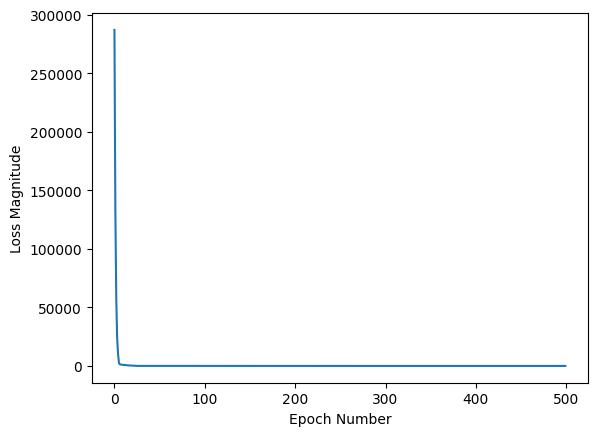

In [10]:
#Exibir estatísticas do treino
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [12]:
#Predição do resultado (minha nn)

#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
#print(model.predict(np.array([7757517.891,-363656.678,-0.250,3.260,-0.250,7757528.493,-363658.826,-0.144,8.55]).reshape(1,9)))
with np.printoptions(precision=6, suppress=True):
    print(model.predict(np.array([7757527.502,-363658.677,-0.154,8.550,7757499.058,-363648.787,-0.527,7.656,0.033]).reshape(1,9)))
#output esperado: 7.656;0.033;0.020
#predição: (v, phi, t)

1/1 [==============================] - 0s 11ms/step
[[ 8.227304 -0.034486  0.006576]]


In [14]:
import emlearn
cmodel = emlearn.convert(model, method='loadable', return_type='regressor')
cmodel.save(file='seqdense.h', name='seqdense')

'#include <eml_net.h>\nstatic const float seqdense_layer0_weights[81] = { 0.120295f, 0.085589f, 0.101039f, 0.069536f, -0.271905f, -0.091762f, -0.136182f, 0.054811f, 0.041245f, 0.453307f, -0.316556f, 0.896481f, -0.409550f, 0.679126f, -0.264376f, -0.480948f, 0.239945f, -0.472261f, -0.727987f, -0.584659f, -0.259330f, 0.005320f, 0.345178f, -0.280081f, -0.579909f, -0.619183f, 0.606655f, -0.063664f, 0.274286f, -0.725096f, -0.669013f, 0.098026f, -0.642200f, -0.194010f, -0.625971f, 0.351265f, -0.092809f, -0.093546f, -0.052633f, -0.062291f, 0.301462f, 0.090835f, 0.124285f, -0.032523f, -0.105016f, 0.137433f, 0.149930f, 0.121874f, 0.572160f, -0.047609f, 0.257773f, 0.223805f, 0.245804f, -0.897363f, 0.020987f, 0.199818f, -0.603844f, -0.551549f, 0.091231f, 0.307130f, -0.487637f, -0.286922f, 0.275430f, -0.637402f, 0.165516f, 0.155480f, -0.131866f, -0.729524f, 0.217554f, -0.495602f, -0.688505f, 0.027777f, 0.590186f, -0.447525f, -0.456062f, -0.287632f, 0.390519f, 0.363377f, -0.144538f, -0.104856f, -0.6

In [32]:
"""Modelo original
#Inputando os dados(modelo original)
inputMatrix = np.array([(100,230,0.95,100),
                        (200,245,0.99,121),
                        ( 40,250,0.91,123)],dtype=float)
outputMatrix = np.array([(120, 5,120),
                         (123,24,100),
                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))
"""

[100.   230.     0.95 100.  ]Input Matrix=[120.   5. 120.]Output Matrix
[200.   245.     0.99 121.  ]Input Matrix=[123.  24. 100.]Output Matrix
[ 40.   250.     0.91 123.  ]Input Matrix=[154.   3. 121.]Output Matrix


In [49]:
"""Primeiros testes
#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
inputMatrix = np.array([(7757517.727,-363656.637,0.025,3.202,-0.251,7757527.998,-363658.752,-0.149,8.55)],dtype=float)

#Saida dos dados: v, phi, t:
outputMatrix = np.array([(3.218,0.025,0.020)],dtype=float)

for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))
"""

[ 7.75751773e+06 -3.63656637e+05  2.50000000e-02  3.20200000e+00
 -2.51000000e-01  7.75752800e+06 -3.63658752e+05 -1.49000000e-01
  8.55000000e+00]Input Matrix=[3.218 0.025 0.02 ]Output Matrix


In [7]:
#Modelo inicial: 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3)

model = tf.keras.Sequential([l0,l1,l2,l3])

In [52]:
#Predição do resultado original
print(model.predict(np.array([120,260,0.98,110]).reshape(1,4)))

1/1 [==============================] - 0s 10ms/step
[[131.42679     5.5687714 137.21587  ]]
